## This script generates figure 4 parts a and b

In [18]:
import os
import pandas as pd
from pathlib import Path
import os
import pandas as pd

os.chdir(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC')


def collect_csv_files(root_dir, output_file):
    valid_file_names = [
        "BF-Online-Sharing-Oblivious-equal", 
        "BFS-Online-Sharing-equal",
        "BFS_Reallocation_equal",
        "FF-Online-Sharing-Oblivious",
        "FFS-Online-Sharing",
        "FFS_Reallocation",
        "WF-Online-Sharing-Oblivious-equal",
        "WFS-Online-Sharing-equal",
        "WFS_Reallocation_equal",
        "RandomS-Online-Sharing",
        "RandomSO-Online-Sharing-Oblivious"
        
    ]

    # Initialize an empty DataFrame
    combined_df = pd.DataFrame()

    for path, subdirs, files in os.walk(root_dir):
        for name in files:
            if name.replace('.csv', '') in valid_file_names:
                file_path = os.path.join(path, name)
                parent_folder = Path(file_path).parent.name  # Category
                grandparent_folder = Path(file_path).parent.parent.name

                df = pd.read_csv(file_path, header=None)
                df.columns = [f"{grandparent_folder}_{name.replace('.csv', '')}_{col}" for col in range(2)]
                df['Category'] = parent_folder

                combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Save the combined dataframe
    combined_df.to_csv(output_file, index=False)
    return combined_df

# Usage
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'  # Replace with your folder path
output_csv_file = os.path.join(root_directory, 'combined_data.csv')  # Output file in root directory
df = collect_csv_files(root_directory, output_csv_file)


step 2

In [19]:
def consolidate_dataframe(df, output_file_path):

    # Grouping the dataframe by 'Category' and then applying a function to 'compact' the non-null values in each column
    consolidated_df = df.groupby('Category').apply(lambda x: x.apply(lambda y: pd.Series(y.dropna().values)))

    # Resetting the index
    consolidated_df.reset_index(drop=True, inplace=True)

    # Save the transformed dataframe to a new CSV file
    consolidated_df.to_csv(output_file_path, index=False)
    return(consolidated_df) 

# Specify the directory and file paths
#root_directory = r'C:\Users\mohse\Documents\Result_TCC'  # Replace with your folder path
input_csv_file = os.path.join(root_directory, 'combined_data.csv')  # Specify your input file name
output_csv_file = os.path.join(root_directory, 'combined_data_consolidate.csv')  # Output file in root directory

# Call the function with the file paths
df_1 = consolidate_dataframe(df, output_csv_file)


In [20]:
def group_by_category_and_find_max(df,output_file_path):
    # Grouping by 'Category' and finding the maximum value in each column for each group
    max_values_df = df.groupby('Category').max()

    # Save the results to a new CSV file
    max_values_df.to_csv(output_file_path)
    return max_values_df

# Specify the directory and file paths
#root_directory = r'C:\Users\mohse\Documents\Result_TCC'  # Replace with your folder path
input_csv_file = os.path.join(root_directory, 'combined_data_consolidate.csv')  # Specify your input file name
output_csv_file_max_data = os.path.join(root_directory, 'combined_data_max.csv')  # Output file in root directory

# Call the function with the file paths
max_values_df=group_by_category_and_find_max(df_1, output_csv_file_max_data)

## Below script is for sharing and non-sharing case

In [21]:
df = max_values_df.copy()
columns_to_sum_BFS = [
    '500-1_BFS-Online-Sharing-equal_0', 
    '500-2_BFS-Online-Sharing-equal_0', 
    '500-3_BFS-Online-Sharing-equal_0'
]
df['sum_BFS'] = df[columns_to_sum_BFS].sum(axis=1)
df['avg_BFS'] = (df[columns_to_sum_BFS].sum(axis=1))/3
df['std_avg_BFS'] = df[columns_to_sum_BFS].std(axis=1)


columns_to_sum_FFS = [
    '500-1_FFS-Online-Sharing_0',
    '500-2_FFS-Online-Sharing_0',
    '500-3_FFS-Online-Sharing_0'
]
df['sum_FFS'] = df[columns_to_sum_FFS].sum(axis=1)
df['avg_FFS'] = (df[columns_to_sum_FFS].sum(axis=1))/3
df['std_avg_FFS'] = df[columns_to_sum_FFS].std(axis=1)


columns_to_sum_WFS = [
     '500-1_WFS-Online-Sharing-equal_0',
     '500-2_WFS-Online-Sharing-equal_0',
     '500-3_WFS-Online-Sharing-equal_0'
]
df['sum_WFS'] = df[columns_to_sum_WFS].sum(axis=1)
df['avg_WFS'] = (df[columns_to_sum_WFS].sum(axis=1))/3
df['std_avg_WFS'] = df[columns_to_sum_WFS].std(axis=1)


columns_to_sum_RandomS = [
     '500-1_RandomS-Online-Sharing_0',
     '500-2_RandomS-Online-Sharing_0',
     '500-3_RandomS-Online-Sharing_0'
]
df['sum_RandomS'] = df[columns_to_sum_RandomS].sum(axis=1)
df['avg_RandomS'] = (df[columns_to_sum_RandomS].sum(axis=1))/3
df['std_avg_RandomS'] = df[columns_to_sum_RandomS].std(axis=1)



#################################################################################

columns_to_sum_BF = [
    '500-1_BF-Online-Sharing-Oblivious-equal_0',
    '500-2_BF-Online-Sharing-Oblivious-equal_0', 
    '500-3_BF-Online-Sharing-Oblivious-equal_0'
]
df['sum_BF'] = df[columns_to_sum_BF].sum(axis=1)
df['avg_BF'] = df[columns_to_sum_BF].sum(axis=1)/3
df['std_avg_BF'] = df[columns_to_sum_BF].std(axis=1)


columns_to_sum_FF = [
    '500-1_FF-Online-Sharing-Oblivious_0',
    '500-2_FF-Online-Sharing-Oblivious_0', 
    '500-3_FF-Online-Sharing-Oblivious_0'
]
df['sum_FF'] = df[columns_to_sum_FF].sum(axis=1)
df['avg_FF'] = df[columns_to_sum_FF].sum(axis=1)/3
df['std_avg_FF'] = df[columns_to_sum_FF].std(axis=1)


columns_to_sum_WF = [
  '500-1_WF-Online-Sharing-Oblivious-equal_0',
  '500-2_WF-Online-Sharing-Oblivious-equal_0',
  '500-3_WF-Online-Sharing-Oblivious-equal_0'
]
df['sum_WF'] = df[columns_to_sum_WF].sum(axis=1)
df['avg_WF'] = df[columns_to_sum_WF].sum(axis=1)/3
df['std_avg_WF'] = df[columns_to_sum_WF].std(axis=1)


columns_to_sum_RandomSO = [
  '500-1_RandomSO-Online-Sharing-Oblivious_0',
  '500-2_RandomSO-Online-Sharing-Oblivious_0',
  '500-3_RandomSO-Online-Sharing-Oblivious_0'
]
df['sum_RandomSO'] = df[columns_to_sum_RandomSO].sum(axis=1)
df['avg_RandomSO'] = df[columns_to_sum_RandomSO].sum(axis=1)/3
df['std_avg_RandomSO'] = df[columns_to_sum_RandomSO].std(axis=1)


###############################################################################################

df['x_over_y_BF'] = df['sum_BFS']/df['sum_BF']
df['x_over_y_FF'] = df['sum_FFS']/df['sum_FF']
df['x_over_y_WF'] = df['sum_WFS']/df['sum_WF']
df['x_over_y_RandomSO'] = df['sum_RandomS']/df['sum_RandomSO']
#####
df['t1_BF'] = (df['500-1_BF-Online-Sharing-Oblivious-equal_0']-df['500-1_BFS-Online-Sharing-equal_0'])/df['500-1_BF-Online-Sharing-Oblivious-equal_0']
df['t2_BF'] = (df['500-2_BF-Online-Sharing-Oblivious-equal_0']-df['500-2_BFS-Online-Sharing-equal_0'])/df['500-2_BF-Online-Sharing-Oblivious-equal_0']
df['t3_BF'] = (df['500-3_BF-Online-Sharing-Oblivious-equal_0']-df['500-3_BFS-Online-Sharing-equal_0'])/df['500-3_BF-Online-Sharing-Oblivious-equal_0']

columns_to_sum_t_BF = ['t1_BF','t2_BF','t3_BF']
df['t_avg_BF'] = (df[columns_to_sum_t_BF].sum(axis=1))/3
df['t_std_BF'] = df[columns_to_sum_t_BF].std(axis=1)
######

df['t1_FF'] = (df['500-1_FF-Online-Sharing-Oblivious_0']-df['500-1_FFS-Online-Sharing_0'])/df['500-1_FF-Online-Sharing-Oblivious_0']
df['t2_FF'] = (df['500-2_FF-Online-Sharing-Oblivious_0']-df['500-2_FFS-Online-Sharing_0'])/df['500-2_FF-Online-Sharing-Oblivious_0']
df['t3_FF'] = (df['500-3_FF-Online-Sharing-Oblivious_0']-df['500-3_FFS-Online-Sharing_0'])/df['500-3_FF-Online-Sharing-Oblivious_0']

columns_to_sum_t_FF = ['t1_FF','t2_FF','t3_FF']
df['t_avg_FF'] = (df[columns_to_sum_t_FF].sum(axis=1))/3
df['t_std_FF'] = df[columns_to_sum_t_FF].std(axis=1)
######

df['t1_WF'] = (df['500-1_WF-Online-Sharing-Oblivious-equal_0']-df['500-1_WFS-Online-Sharing-equal_0'])/df['500-1_WF-Online-Sharing-Oblivious-equal_0']
df['t2_WF'] = (df['500-2_WF-Online-Sharing-Oblivious-equal_0']-df['500-2_WFS-Online-Sharing-equal_0'])/df['500-2_WF-Online-Sharing-Oblivious-equal_0']
df['t3_WF'] = (df['500-3_WF-Online-Sharing-Oblivious-equal_0']-df['500-3_WFS-Online-Sharing-equal_0'])/df['500-3_WF-Online-Sharing-Oblivious-equal_0']

columns_to_sum_t_WF = ['t1_WF','t2_WF','t3_WF']
df['t_avg_WF'] = (df[columns_to_sum_t_WF].sum(axis=1))/3
df['t_std_WF'] = df[columns_to_sum_t_WF].std(axis=1)

######

df['t1_RandomSO'] = (df['500-1_RandomSO-Online-Sharing-Oblivious_0']-df['500-1_RandomS-Online-Sharing_0'])/df['500-1_RandomSO-Online-Sharing-Oblivious_0']
df['t2_RandomSO'] = (df['500-2_RandomSO-Online-Sharing-Oblivious_0']-df['500-2_RandomS-Online-Sharing_0'])/df['500-2_RandomSO-Online-Sharing-Oblivious_0']
df['t3_RandomSO'] = (df['500-3_RandomSO-Online-Sharing-Oblivious_0']-df['500-3_RandomS-Online-Sharing_0'])/df['500-3_RandomSO-Online-Sharing-Oblivious_0']

columns_to_sum_t_RandomSO = ['t1_RandomSO','t2_RandomSO','t3_RandomSO']
df['t_avg_RandomSO'] = (df[columns_to_sum_t_RandomSO].sum(axis=1))/3
df['t_std_RandomSO'] = df[columns_to_sum_t_RandomSO].std(axis=1)

In [22]:
output_csv_file_sharing = os.path.join(root_directory, 'combined_data_test_sharing.csv')
df.to_csv(output_csv_file_sharing)

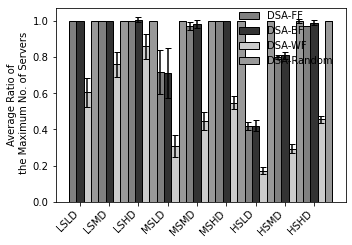

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv(output_csv_file_sharing)  # Ensure that df is defined and loaded with your dataset

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart and error bars, reordered as per your request
x_over_y_columns = ['x_over_y_FF', 'x_over_y_BF', 'x_over_y_WF', 'x_over_y_RandomSO']
std_dev_columns = ['t_std_FF', 't_std_BF', 't_std_WF', 't_std_RandomSO']
x_over_y_labels = ['FF', 'BF', 'WF', 'RandomSO']  # New order of labels
legend_labels = ['DSA-FF', 'DSA-BF', 'DSA-WF', 'DSA-Random']  # New legend labels

# The x position of bars
barWidth = 0.25
r1 = np.arange(len(data['Category']))

# Set color for grayscale by varying the lightness between 0 and 1
colors = ['0.5', '0.2', '0.8', '0.6']  # Colors ordered to match the new bar order

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(5, 3.5))

# Add bars for each column
for i, (x_over_y_col, std_dev_col, color, label) in enumerate(zip(x_over_y_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (barWidth * i) for x in r1]
    plt.bar(r, data[x_over_y_col], width=barWidth, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
# plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth for r in r1], data['Category'].values, rotation=45, ha='right')

# Y-axis label
plt.ylabel('Average Ratio of\n the Maximum No. of Servers')

# Create legend and place it at the top right without overlapping with the data
#plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(0.6, 1.03), frameon=False, shadow=False, ncol=1)

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.tight_layout()
#root_directory = r'C:\Users\mohse\Documents\Result_TCC'  # Replace with your folder path
output_csv_file_relative_max = os.path.join(root_directory, 'relative_max_server.csv')
df.to_csv(output_csv_file_relative_max)
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\relative_max_server.pdf', dpi=300)
plt.show()


# apply non-ratio bars according to the reviewer's comment

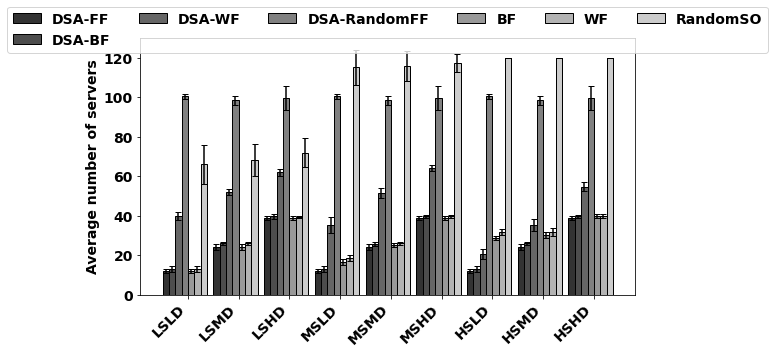

Saved to: C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\absolute_server_counts.pdf


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# use the df you built above; make Category a column for plotting
plot_df = df.reset_index()  # index was Category
plot_df.rename(columns={'index': 'Category'}, inplace=True)

# map long category names to short labels if needed
abbr = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
plot_df['Category'] = plot_df['Category'].map(lambda x: abbr.get(x, x))

# columns to plot (means) and their error bars (std)
cols_share   = ['avg_FFS', 'avg_BFS', 'avg_WFS', 'avg_RandomS']
errs_share   = ['std_avg_FFS', 'std_avg_BFS', 'std_avg_WFS', 'std_avg_RandomS']
cols_noshare = ['avg_FF',  'avg_BF',  'avg_WF', 'avg_RandomSO']
errs_noshare = ['std_avg_FF',  'std_avg_BF',  'std_avg_WF', 'std_avg_RandomSO']

labels = ['DSA-FF', 'DSA-BF', 'DSA-WF', 'DSA-Random'
          'FF',  'BF',  'WF', 'RandomSO']

# bar layout
n_cat = len(plot_df)
bar_w = 0.125
x0 = np.arange(n_cat)

# simple gray palette (light→dark); adjust if you like
colors = ['0.2', '0.3', '0.4', '0.5', '0.6','0.7', '0.8', '0.9'] 

plt.figure(figsize=(10, 5))

# plot sharing bars first, then non-sharing
all_cols  = cols_share + cols_noshare
all_errs  = errs_share + errs_noshare

for i, (c_mean, c_err, color, lab) in enumerate(zip(all_cols, all_errs, colors, labels)):
    xi = x0 + i*bar_w
    plt.bar(xi, plot_df[c_mean],
            yerr=plot_df[c_err],
            width=bar_w, edgecolor='black', capsize=3,
            color=color, label=lab)

# x-ticks centered under the 6-bar groups
group_center = x0 + (len(all_cols)-1)*bar_w/2
plt.xticks(group_center, plot_df['Category'].values, rotation=45, ha='right', fontweight='bold', fontsize=14)
# Bold Y-ticks
plt.yticks(fontweight='bold', fontsize=14)

plt.ylabel('Average number of servers',fontweight='bold', fontsize=14)  # <-- actual values, not ratios
#plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.25), ncol=3, frameon=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=True, shadow=False, ncol=6, prop={'weight': 'bold', 'size': 14})
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

# save/show
out_pdf = os.path.join(root_directory, 'absolute_server_counts.pdf')
plt.savefig(out_pdf, dpi=300)
plt.show()
print('Saved to:', out_pdf)


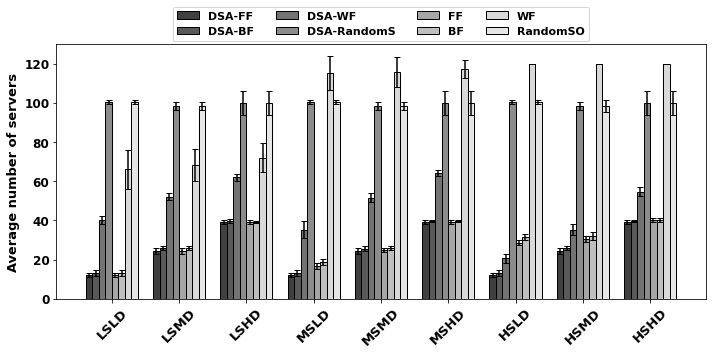

Saved to: C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\number_server_counts_random.pdf


In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Assumes you already built `df` (with the avg_* and std_* columns) ---
# If your categories are in the index, bring them out to a column:
plot_df = df.reset_index().rename(columns={'index': 'Category'})

# Optional: map long category names to short labels
abbr = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
plot_df['Category'] = plot_df['Category'].map(lambda x: abbr.get(x, x))

# Means and STDs to plot (aware/sharing, then oblivious)
cols_share   = ['avg_FFS', 'avg_BFS', 'avg_WFS', 'avg_RandomS']
errs_share   = ['std_avg_FFS', 'std_avg_BFS', 'std_avg_WFS', 'std_avg_RandomS']
cols_noshare = ['avg_FF',  'avg_BF',  'avg_WF', 'avg_RandomSO']
errs_noshare = ['std_avg_FF',  'std_avg_BF',  'std_avg_WF', 'std_avg_RandomSO']

all_cols = cols_share + cols_noshare
all_errs = errs_share + errs_noshare

labels = [
    'DSA-FF', 'DSA-BF', 'DSA-WF', 'DSA-RandomS',
    'FF', 'BF', 'WF', 'RandomSO'
]

# Make sure everything lines up (8 each)
assert len(all_cols) == len(all_errs) == len(labels) == 8, "Expected 8 series."

# --- Layout with group spacing ---
n_cat  = len(plot_df)
n_bars = len(all_cols)       # 8 bars per category
bar_w = 0.15                 # bar width
group_gap = 0.35             # extra empty space between categories

# x positions for the *start* of each group
x0 = np.arange(n_cat) * (n_bars * bar_w + group_gap)

# Simple gray palette (dark -> light) for 8 bars
colors = ['0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.9']

plt.figure(figsize=(10, 5))

for i, (c_mean, c_err, color, lab) in enumerate(zip(all_cols, all_errs, colors, labels)):
    xi = x0 + i * bar_w
    plt.bar(
        xi, plot_df[c_mean],
        yerr=plot_df[c_err],
        width=bar_w,
        edgecolor='black',
        capsize=3,
        color=color,
        label=lab
    )

# Center xticks under each group of 8 bars
# put tick exactly between bar #3 and bar #4 (0-indexed) → after the 4th, before the 5th
group_centers = x0 + 3.5 * bar_w
plt.xticks(group_centers, plot_df['Category'], rotation=45, ha='center',
           fontweight='bold', fontsize=13)


# Axes labels & ticks
plt.ylabel('Average number of servers', fontweight='bold', fontsize=13)
plt.yticks(fontweight='bold', fontsize=12)

# Legend
plt.legend(
    loc='upper center', bbox_to_anchor=(0.5, 1.17),
    frameon=True, ncol=4, prop={'weight': 'bold', 'size': 11}
)

plt.subplots_adjust(bottom=0.22)
plt.tight_layout()

# Save/show
# Set this to your folder if desired:
# root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'
out_pdf = os.path.join(root_directory, 'number_server_counts_random.pdf')
plt.savefig(out_pdf, dpi=300)
plt.show()
print('Saved to:', out_pdf)


## Below is the script with reordering algorithms

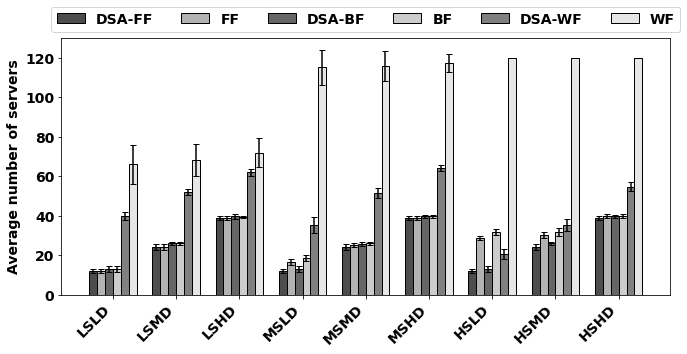

Saved to: C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\absolute_server_counts.pdf


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# use the df you built above; make Category a column for plotting
plot_df = df.reset_index()  # index was Category
plot_df.rename(columns={'index': 'Category'}, inplace=True)

# map long category names to short labels if needed
abbr = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
plot_df['Category'] = plot_df['Category'].map(lambda x: abbr.get(x, x))

# columns to plot (means) and their error bars (std)
cols_share   = ['avg_FFS', 'avg_BFS', 'avg_WFS']
errs_share   = ['std_avg_FFS', 'std_avg_BFS', 'std_avg_WFS']
cols_noshare = ['avg_FF',  'avg_BF',  'avg_WF']
errs_noshare = ['std_avg_FF',  'std_avg_BF',  'std_avg_WF']

# === REORDER ALGORITHMS AS REQUESTED ===
all_cols = [
    'avg_FFS', 'avg_FF',        # DSA-FF, FF
    'avg_BFS', 'avg_BF',        # DSA-BF, BF
    'avg_WFS', 'avg_WF'         # DSA-WF, WF
]

all_errs = [
    'std_avg_FFS', 'std_avg_FF',
    'std_avg_BFS', 'std_avg_BF',
    'std_avg_WFS', 'std_avg_WF'
]

labels = ['DSA-FF', 'FF', 'DSA-BF', 'BF', 'DSA-WF', 'WF']

# matched grayscale tones for pairing
colors = ['0.3', '0.7',   # FF pair
          '0.4', '0.8',   # BF pair
          '0.5', '0.9']   # WF pair

# bar layout
n_cat = len(plot_df)
bar_w = 0.125
x0 = np.arange(n_cat)

plt.figure(figsize=(10, 5))

# PLOT BARS
for i, (c_mean, c_err, color, lab) in enumerate(zip(all_cols, all_errs, colors, labels)):
    xi = x0 + i*bar_w
    plt.bar(xi, plot_df[c_mean],
            yerr=plot_df[c_err],
            width=bar_w, edgecolor='black', capsize=3,
            color=color, label=lab)

# x-ticks centered under the grouped bars
group_center = x0 + (len(all_cols)-1)*bar_w/2
plt.xticks(group_center, plot_df['Category'].values, rotation=45, ha='right', fontweight='bold', fontsize=14)

# y-axis formatting
plt.yticks(fontweight='bold', fontsize=14)
plt.ylabel('Average number of servers', fontweight='bold', fontsize=14)

# legend formatting
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=True, shadow=False,
           ncol=6, prop={'weight': 'bold', 'size': 14})

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

# save/show
out_pdf = os.path.join(root_directory, 'absolute_server_counts.pdf')
plt.savefig(out_pdf, dpi=300)
plt.show()

print('Saved to:', out_pdf)


In [24]:
# output_csv_file = os.path.join(root_directory, 'combined_data_test.csv')
# df.to_csv(output_csv_file)

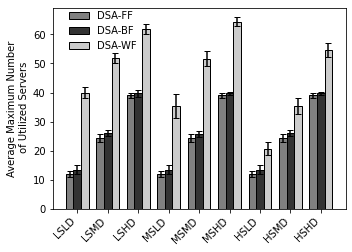

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Load the data from the CSV file
data = pd.read_csv(output_csv_file_sharing)

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart
avg_columns = ['avg_FFS', 'avg_BFS', 'avg_WFS']
#std_dev_columns = [col for col in data.columns if 'std' in col.lower()]
std_dev_columns = ['std_avg_FFS', 'std_avg_BFS', 'std_avg_WFS']

legend_labels = ['DSA-FF', 'DSA-BF', 'DSA-WF']  # New legend labels

# The x position of bars
bar_width = 0.25
r1 = np.arange(len(data['Category']))

# Set colors for the bars
colors = ['0.5', '0.2', '0.8']  # Grayscale colors

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(5, 3.6))

# Add bars for each column
for i, (avg_col, std_dev_col, color, label) in enumerate(zip(avg_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (bar_width * i) for x in r1]
    # Add yerr=std_dev_col if standard deviation column exists for the corresponding avg_col
    #std_dev_col = [col for col in std_dev_columns if col.lower().endswith(avg_col.split('_')[1].lower())]
    #yerr = data[std_dev_col[0]] if std_dev_col else None
    plt.bar(r, data[avg_col], width=bar_width, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width for r in range(len(r1))], data['Category'].values, rotation=45, ha='right')


# Y-axis label
plt.ylabel('Average Maximum Number\n of Utilized Servers')

# Create legend and title
plt.legend(loc='upper left', bbox_to_anchor=(0.024, 1.03), frameon=False, shadow=False, ncol=1)
#plt.legend()
#plt.title('Average Values with Standard Deviation Error Bars')

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot to an accessible path
output_csv_file_sum_avg = os.path.join(root_directory, 'sum_avg_server.csv')
df.to_csv(output_csv_file_sum_avg)

plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\sum_avg_server.pdf', dpi=300)

# Display the plot
plt.show()


In [26]:
# output_csv_file = os.path.join(root_directory, 'combined_data_test.csv')
# df.to_csv(output_csv_file)

## Below script is for reallocation and non sharing case

In [27]:
df = max_values_df.copy()
columns_to_sum_BFS_reallocation = [
    '500-1_BFS_Reallocation_equal_0', 
    '500-2_BFS_Reallocation_equal_0', 
    '500-3_BFS_Reallocation_equal_0'
]
df['sum_BFS_reallocation'] = df[columns_to_sum_BFS_reallocation].sum(axis=1)
df['avg_BFS_reallocation'] = (df[columns_to_sum_BFS_reallocation].sum(axis=1))/3
df['std_avg_BFS_reallocation'] = df[columns_to_sum_BFS_reallocation].std(axis=1)


columns_to_sum_FFS_reallocation = [
    '500-1_FFS_Reallocation_0',
    '500-2_FFS_Reallocation_0',
    '500-3_FFS_Reallocation_0'
]
df['sum_FFS_reallocation'] = df[columns_to_sum_FFS_reallocation].sum(axis=1)
df['avg_FFS_reallocation'] = (df[columns_to_sum_FFS_reallocation].sum(axis=1))/3
df['std_avg_FFS_reallocation'] = df[columns_to_sum_FFS_reallocation].std(axis=1)


columns_to_sum_WFS_reallocation = [
     '500-1_WFS_Reallocation_equal_0',
     '500-2_WFS_Reallocation_equal_0',
     '500-3_WFS_Reallocation_equal_0'
]
df['sum_WFS_reallocation'] = df[columns_to_sum_WFS_reallocation].sum(axis=1)
df['avg_WFS_reallocation'] = (df[columns_to_sum_WFS_reallocation].sum(axis=1))/3
df['std_avg_WFS_reallocation'] = df[columns_to_sum_WFS_reallocation].std(axis=1)



#################################################################################

columns_to_sum_BF = [
    '500-1_BF-Online-Sharing-Oblivious-equal_0',
    '500-2_BF-Online-Sharing-Oblivious-equal_0', 
    '500-3_BF-Online-Sharing-Oblivious-equal_0'
]
df['sum_BF'] = df[columns_to_sum_BF].sum(axis=1)



columns_to_sum_FF = [
    '500-1_FF-Online-Sharing-Oblivious_0',
    '500-2_FF-Online-Sharing-Oblivious_0', 
   '500-3_FF-Online-Sharing-Oblivious_0'
]
df['sum_FF'] = df[columns_to_sum_FF].sum(axis=1)



columns_to_sum_WF = [
  '500-1_WF-Online-Sharing-Oblivious-equal_0',
   '500-2_WF-Online-Sharing-Oblivious-equal_0',
    '500-3_WF-Online-Sharing-Oblivious-equal_0'
]
df['sum_WF'] = df[columns_to_sum_WF].sum(axis=1)

#################################################################################

df['x_over_y_BF_reallocation'] = df['sum_BFS_reallocation']/df['sum_BF']
df['x_over_y_FF_reallocation'] = df['sum_FFS_reallocation']/df['sum_FF']
df['x_over_y_WF_reallocation'] = df['sum_WFS_reallocation']/df['sum_WF']
#####
df['t1_BF_reallocation'] = (df['500-1_BF-Online-Sharing-Oblivious-equal_0']-df['500-1_BFS_Reallocation_equal_0'])/df['500-1_BF-Online-Sharing-Oblivious-equal_0']
df['t2_BF_reallocation'] = (df['500-2_BF-Online-Sharing-Oblivious-equal_0']-df['500-2_BFS_Reallocation_equal_0'])/df['500-2_BF-Online-Sharing-Oblivious-equal_0']
df['t3_BF_reallocation'] = (df['500-3_BF-Online-Sharing-Oblivious-equal_0']-df['500-3_BFS_Reallocation_equal_0'])/df['500-3_BF-Online-Sharing-Oblivious-equal_0']

columns_to_sum_t_BF_reallocation = ['t1_BF_reallocation','t2_BF_reallocation','t3_BF_reallocation']
df['t_avg_BF_reallocation'] = (df[columns_to_sum_t_BF_reallocation].sum(axis=1))/3
df['t_std_BF_reallocation'] = df[columns_to_sum_t_BF_reallocation].std(axis=1)
######

df['t1_FF_reallocation'] = (df['500-1_FF-Online-Sharing-Oblivious_0']-df['500-1_FFS_Reallocation_0'])/df['500-1_FF-Online-Sharing-Oblivious_0']
df['t2_FF_reallocation'] = (df['500-2_FF-Online-Sharing-Oblivious_0']-df['500-2_FFS_Reallocation_0'])/df['500-2_FF-Online-Sharing-Oblivious_0']
df['t3_FF_reallocation'] = (df['500-3_FF-Online-Sharing-Oblivious_0']-df['500-3_FFS_Reallocation_0'])/df['500-3_FF-Online-Sharing-Oblivious_0']

columns_to_sum_t_FF_reallocation = ['t1_FF_reallocation','t2_FF_reallocation','t3_FF_reallocation']
df['t_avg_FF_reallocation'] = (df[columns_to_sum_t_FF_reallocation].sum(axis=1))/3
df['t_std_FF_reallocation'] = df[columns_to_sum_t_FF_reallocation].std(axis=1)



df['t1_WF_reallocation'] = (df['500-1_WF-Online-Sharing-Oblivious-equal_0']-df['500-1_WFS_Reallocation_equal_0'])/df['500-1_WF-Online-Sharing-Oblivious-equal_0']
df['t2_WF_reallocation'] = (df['500-2_WF-Online-Sharing-Oblivious-equal_0']-df['500-2_WFS_Reallocation_equal_0'])/df['500-2_WF-Online-Sharing-Oblivious-equal_0']
df['t3_WF_reallocation'] = (df['500-3_WF-Online-Sharing-Oblivious-equal_0']-df['500-3_WFS_Reallocation_equal_0'])/df['500-3_WF-Online-Sharing-Oblivious-equal_0']

columns_to_sum_t_WF_reallocation = ['t1_WF_reallocation','t2_WF_reallocation','t3_WF_reallocation']
df['t_avg_WF_reallocation'] = (df[columns_to_sum_t_WF_reallocation].sum(axis=1))/3
df['t_std_WF_reallocation'] = df[columns_to_sum_t_WF_reallocation].std(axis=1)

In [28]:
output_csv_file_reallocation = os.path.join(root_directory, 'combined_data_test_reallocation.csv')
df.to_csv(output_csv_file_reallocation)

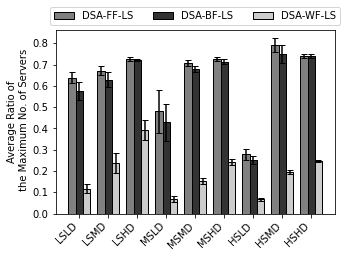

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv(output_csv_file_reallocation)  # Ensure that df is defined and loaded with your dataset

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart and error bars, reordered as per your request
x_over_y_columns_reallocation = ['x_over_y_FF_reallocation', 'x_over_y_BF_reallocation', 'x_over_y_WF_reallocation']
std_dev_columns_reallocation = ['t_std_FF_reallocation', 't_std_BF_reallocation', 't_std_WF_reallocation']
x_over_y_labels_reallocation = ['FF', 'BF', 'WF']  # New order of labels
legend_labels_reallocation = ['DSA-FF-LS', 'DSA-BF-LS', 'DSA-WF-LS']  # New legend labels

# The x position of bars
barWidth = 0.25
r1 = np.arange(len(data['Category']))

# Set color for grayscale by varying the lightness between 0 and 1
colors_reallocation = ['0.5', '0.2', '0.8']  # Colors ordered to match the new bar order

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(5, 3.5))

# Add bars for each column
for i, (x_over_y_col, std_dev_col, color, label) in enumerate(zip(x_over_y_columns_reallocation, std_dev_columns_reallocation, colors_reallocation, legend_labels_reallocation)):
    r = [x + (barWidth * i) for x in r1]
    plt.bar(r, data[x_over_y_col], width=barWidth, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
# plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth for r in r1], data['Category'].values, rotation=45, ha='right')

# Y-axis label
plt.ylabel('Average Ratio of\n the Maximum No. of Servers')

# Create legend and place it at the top outside of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=True, shadow=False, ncol=3)

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
# plt.tight_layout(rect=[0, 0, 0.8, 1])
#root_directory = r'C:\Users\mohse\Documents\Result_TCC'  # Replace with your folder path
output_csv_file_max_reallocation = os.path.join(root_directory, 'relative_max_server_reallocation.csv')
df.to_csv(output_csv_file_max_reallocation)
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\relative_max_server_reallocation.pdf', dpi=300)
plt.show()

In [30]:
# output_csv_file = os.path.join(root_directory, 'combined_data_test.csv')
# df.to_csv(output_csv_file)

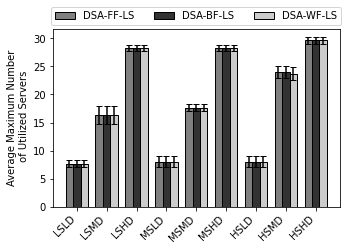

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Load the data from the CSV file
data = pd.read_csv(output_csv_file_reallocation)
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart
avg_columns = ['avg_FFS_reallocation', 'avg_BFS_reallocation', 'avg_WFS_reallocation']
#std_dev_columns = [col for col in data.columns if 'std' in col.lower()]
std_dev_columns = ['std_avg_FFS_reallocation', 'std_avg_BFS_reallocation', 'std_avg_WFS_reallocation']

legend_labels = ['DSA-FF-LS', 'DSA-BF-LS', 'DSA-WF-LS']  # New legend labels

# The x position of bars
bar_width = 0.25
r1 = np.arange(len(data['Category']))

# Set colors for the bars
colors = ['0.5', '0.2', '0.8']  # Grayscale colors

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(5, 3.6))

# Add bars for each column
for i, (avg_col, std_dev_col, color, label) in enumerate(zip(avg_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (bar_width * i) for x in r1]
    # Add yerr=std_dev_col if standard deviation column exists for the corresponding avg_col
    #std_dev_col = [col for col in std_dev_columns if col.lower().endswith(avg_col.split('_')[1].lower())]
    #yerr = data[std_dev_col[0]] if std_dev_col else None
    plt.bar(r, data[avg_col], width=bar_width, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width for r in range(len(r1))], data['Category'].values, rotation=45, ha='right')


# Y-axis label
plt.ylabel('Average Maximum Number\n of Utilized Servers')

# Create legend and place it at the top outside of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=True, shadow=False, ncol=3)

#plt.legend()
#plt.title('Average Values with Standard Deviation Error Bars')

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot to an accessible path
output_csv_file_sum_reallocation = os.path.join(root_directory, 'sum_avg_server_reallocation.csv')
df.to_csv(output_csv_file_sum_reallocation)

plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\sum_avg_server_reallocation.pdf', dpi=300)

# Display the plot
plt.show()

In [32]:
# output_csv_file = os.path.join(root_directory, 'combined_data_test.csv')
# df.to_csv(output_csv_file)

## below scripts are for combination of sharing and reallocation

# 1. Average Ratio of the Maximum No. of Servers

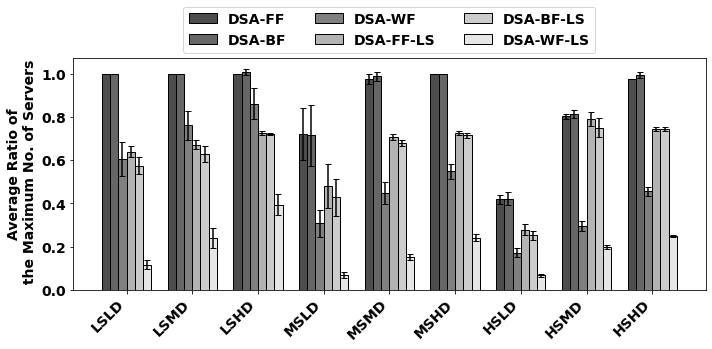

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data from the CSV file
#data = pd.read_csv(output_csv_file)
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'


# Load the data from each CSV file
data_reallocation = pd.read_csv(output_csv_file_reallocation)
data_sharing = pd.read_csv(output_csv_file_sharing)


data = pd.merge(data_reallocation, data_sharing, on='Category', suffixes=('_reallocation', '_sharing'))

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart and error bars
x_over_y_columns = ['x_over_y_FF', 'x_over_y_BF', 'x_over_y_WF', 'x_over_y_FF_reallocation', 'x_over_y_BF_reallocation', 'x_over_y_WF_reallocation']
std_dev_columns = ['t_std_FF', 't_std_BF', 't_std_WF', 't_std_FF_reallocation', 't_std_BF_reallocation', 't_std_WF_reallocation']
legend_labels = ['DSA-FF', 'DSA-BF', 'DSA-WF', 'DSA-FF-LS', 'DSA-BF-LS', 'DSA-WF-LS']

# The x position of bars
barWidth = 0.125  # Adjusted for 6 bars
r1 = np.arange(len(data['Category']))

# Set color for grayscale by varying the lightness between 0 and 1
colors = ['0.3', '0.4', '0.5', '0.7', '0.8', '0.9']  # Colors ordered to match the new bar order

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(10, 5))  # Adjusted size for better fit and visibility

# Add bars for each column
for i, (x_over_y_col, std_dev_col, color, label) in enumerate(zip(x_over_y_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (barWidth * i) for x in r1]
    plt.bar(r, data[x_over_y_col], width=barWidth, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth*2.5 for r in r1], data['Category'].values, rotation=45, ha='right', fontweight='bold', fontsize=14)

# Y-axis label
plt.ylabel('Average Ratio of\n the Maximum No. of Servers', fontweight='bold', fontsize=14)

# Bold Y-ticks
plt.yticks(fontweight='bold', fontsize=14)

# Create legend and place it at the top right without overlapping with the data
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), frameon=True, shadow=False, ncol=3, prop={'weight': 'bold', 'size': 14})

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.tight_layout()
#plt.savefig(output_csv_file.replace('.csv', '_plot.pdf'), dpi=300)  # Save plot using the path for data but with a .pdf extension

output_csv_file_fig4a = os.path.join(root_directory, 'final_result_fig4a.csv')
df.to_csv(output_csv_file_fig4a)

plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\final_result_fig4a.pdf', dpi=300)
plt.show()


# 2. Average Maximum Number of Utilized Servers

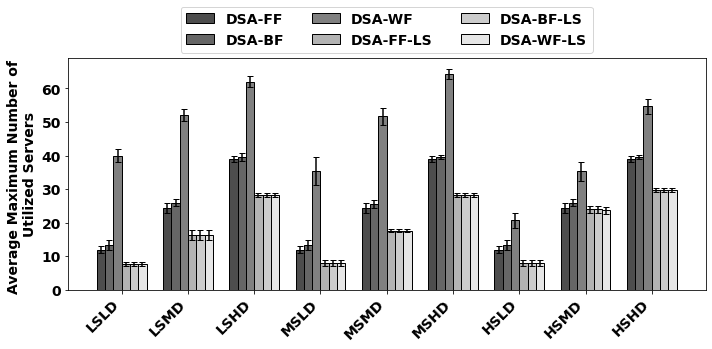

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Load the data from the CSV file
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'
#data = pd.read_csv(output_csv_file)

# Load the data from each CSV file
data_reallocation = pd.read_csv(output_csv_file_reallocation)
data_sharing = pd.read_csv(output_csv_file_sharing)


data = pd.merge(data_reallocation, data_sharing, on='Category', suffixes=('_reallocation', '_sharing'))

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart
avg_columns = ['avg_FFS', 'avg_BFS', 'avg_WFS', 'avg_FFS_reallocation', 'avg_BFS_reallocation', 'avg_WFS_reallocation']
std_dev_columns = ['std_avg_FFS', 'std_avg_BFS', 'std_avg_WFS', 'std_avg_FFS_reallocation', 'std_avg_BFS_reallocation', 'std_avg_WFS_reallocation']
legend_labels = ['DSA-FF', 'DSA-BF', 'DSA-WF', 'DSA-FF-LS', 'DSA-BF-LS', 'DSA-WF-LS']

# The x position of bars
bar_width = 0.125  # Adjusted bar width
r1 = np.arange(len(data['Category']))

# Set colors for the bars
colors = ['0.3', '0.4', '0.5', '0.7', '0.8', '0.9']  # Adjusted color shades for clear differentiation

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(10, 5))  # Adjusted figure size for clarity

# Add bars for each column
for i, (avg_col, std_dev_col, color, label) in enumerate(zip(avg_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (bar_width * i) for x in r1]
    plt.bar(r, data[avg_col], width=bar_width, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
plt.xticks([r + 2.5 * bar_width for r in range(len(r1))], data['Category'].values, rotation=45, ha='right', fontweight='bold', fontsize=14)

# Y-axis label
plt.ylabel('Average Maximum Number of \nUtilized Servers', fontweight='bold', fontsize=14)

# Bold Y-ticks
plt.yticks(fontweight='bold', fontsize=14)

# Create legend and place it above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), frameon=True, shadow=False, ncol=3, prop={'weight': 'bold', 'size': 14})

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.2)

# Tight layout for better spacing
plt.tight_layout()


output_csv_file_fig4b = os.path.join(root_directory, 'final_result_fig4b.csv')
df.to_csv(output_csv_file_fig4b)

# Save the plot to an accessible path
plt.savefig(os.path.join(root_directory, 'final_result_fig4b.pdf'), dpi=300)

# Display the plot
plt.show()
